**PREDICTION OF EMPLOYEE LAYOFFS USING MACHINE LEARNING**

*
**1) Understanding Problem Statement**

**Problem Statement:**
Layoffs are prevalent in many industries and are influenced by various factors, including economic conditions and organizational changes. Predicting which employees are at risk of layoffs is complex but essential for effective workforce managemnt.

**Approach:**
Develop a machine learning model to predict the likelihood of employee layoffs based on features such as performance metrics, departmental health, and market trends, using historical data from companies that have experienced lyoffs.

**Objective:**
To create a predictive model for employe layoffs.

**Benefits:**
- Data-driven insights for HR departments.
- Targeted assistance for at-risk employees.
- Improved workforce planning.
- Increased transparency, maintaining trust among employees.


Libraries:-

1. **pandas**: Handles data manipulation and analysis (e.g., loading, cleaning, and transforming datasets).
2. **numpy**: Supports mathematical operations, especially with arrays and matrices.
3. **matplotlib.pyplot**: Basic plotting library for data visualization (e.g., line plots, bar charts).
4. **seaborn**: Enhances visualizations with better plots (e.g., heatmaps, pair plots).
5. **train_test_split**: Splits data into training and testing sets.
6. **RandomForestClassifier**: Ensemble learning algorithm for classification tasks using decision trees.
7. **classification_report, confusion_matrix, accuracy_score**: Tools for evaluating model performance in classification.
8. **LabelEncoder**: Converts categorical labels into numerical values.
9. **StandardScaler**: Standardizes features by scaling them to have zero mean and unit variance.
10. **tensorflow/keras**: Used for building deep learning models (e.g., neural networks).
11. **streamlit**: Helps create simple web apps for machine learning models, allowing easy interaction with users.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import warnings

### 1. **Load the Dataset**
   - Loads the dataset from an Excel file into a DataFrame using `pd.read_excel()`.

### 2. **Display the First Few Rows**
   - Displays the first 5 rows of the dataset to inspect its structure using `data.head(`.

### 3. **Check for Missing Values**
   - Identifies missing values in each column using `data.isnull().sm()`.

### 4. **Encoding Categorical Columns**
   - Converts categorical variables to numerical format using `LabelEncoder()` for easier model interpetation.

### 5. **Feature Engineering**
   - Calculates the number of years an employee has been with the company based on their 'Joning Date'.

### 6. **Drop Unnecessary Columns**
   - Removes irrelevant columns like 'Employee Name', 'Employee ID', and 'Joining Date' to clean p the dataset.

### 7. **Display Cleaned Data**
   - Shows the cleaned dataset after preprocessing steps using `data_cleaned.head()`.

In [8]:
# Load the dataset
file_path = 'employee_layoff_dataset_large.xlsx' # Replace with your file path
data = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()

# Check for missing values
print(data.isnull().sum())

# Encoding categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Marital Status', 'Company Name', 'Region', 'Job Role', 
                       'Employment Type', 'Voluntary Exit', 'Employment Status', 'Layoff Status']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Feature Engineering: Converting 'Joining Date' to 'Years at Company'
data['Joining Date'] = pd.to_datetime(data['Joining Date'])
data['Years at Company'] = 2024 - data['Joining Date'].dt.year

# Drop unnecessary columns
data_cleaned = data.drop(['Employee Name', 'Employee ID', 'Joining Date'], axis=1)

# Display the cleaned data
data_cleaned.head()


Employee ID                      0
Employee Name                    0
Age                              0
Gender                           0
Marital Status                   0
Joining Date                     0
Company Name                     0
Region                           0
Tenure (in years)                0
Job Role                         0
Department                       0
Education Qualification          0
Experience (in years)            0
Performance Rating               0
Project Contribution             0
Key Projects Handled             0
Salary (Annual)                  0
Promotions Received              0
Previous Layoffs Experience      0
Last Promotion Date              0
Working Hours Per Week           0
Manager Feedback                 0
Disciplinary Issues              0
Certifications Attained          0
Absenteeism Rate                 0
Last Performance Review Score    0
Projects Completed               0
Skills                           0
Resignation Intentio

,Age,Gender,Marital Status,Company Name,Region,Tenure (in years),Job Role,Department,Education Qualification,Experience (in years),...,Skills,Resignation Intentions,Training Attended,Overtime Hours,Distance from Office,Employment Type,Voluntary Exit,Employment Status,Layoff Status,Years at Company
0,60,1,1,0,0,8.030565,5,Operations,PhD,11.663766,...,Insurance underwriter,No,2,7,11.82,0,1,1,0,8
1,42,0,2,6,1,14.278623,3,R&D,Master's Degree,8.332324,...,"Research officer, trade union",No,2,7,4.51,1,1,0,0,7
2,55,1,2,3,1,1.367016,3,Marketing,PhD,11.621886,...,Retail banker,No,1,13,23.29,2,1,0,1,10
3,32,1,2,4,3,14.974271,0,Operations,PhD,18.039953,...,Production manager,Yes,4,49,26.35,1,0,0,1,12
4,33,0,1,1,3,6.095190,2,Operations,PhD,26.242404,...,"Engineer, control and instrumentation",No,5,35,21.04,2,0,0,1,12




### 1. **Age Distribution of Employees**:
   - A histogram (`sns.histplot`) shows the distribution of employee ages. The KDE (Kernel Density Estimate) is overlaid to smooth the distribution cure.

### 2. **Layoff Status Distribution**:
   - A bar chart (`sns.countplot`) visualizes how many employees were laid off versus those who weren't. Categorical data (`Layoff Status`) is plotted with a palette for differentition.

### 3. **Correlation Heatmap**:
   - A heatmap (`sns.heatmap`) displays correlations between numerical columns in the dataset. Annotations show correlation coefficients for bedtter reaability.

### 4. **Performance Rating vs Layoff Status**:
   - A boxplot (`sns.boxplot`) compares the performance ratings of employees based on their layoff status. This shows the distribution and outliers of performance ratings for each layoff stats category.

### 5. **Tenure vs Layoff Status**:
   - Another boxplot visualizing the relationship between the number of years at the company (tenure) and whether the employee was lid off or not.

### 6. **Gender Distribution of Employees**:
   - A count plot shows the distribution of employees by gender. The gender is encoded numerically, with 0 representing females and 1 rpresenting males.

### 7. **Region vs Layoff Status**:
   - A count plot compares the number of layoffs across different regions. It uses the `hue` argument to differentiate between laid-off and nlding predictive models.

Age                                       int64
Gender                                    int32
Marital Status                            int32
Company Name                              int32
Region                                    int32
Tenure (in years)                       float64
Job Role                                  int32
Department                               object
Education Qualification                  object
Experience (in years)                   float64
Performance Rating                        int64
Project Contribution                      int64
Key Projects Handled                     object
Salary (Annual)                         float64
Promotions Received                       int64
Previous Layoffs Experience              object
Last Promotion Date              datetime64[ns]
Working Hours Per Week                    int64
Manager Feedback                         object
Disciplinary Issues                       int64
Certifications Attained                 

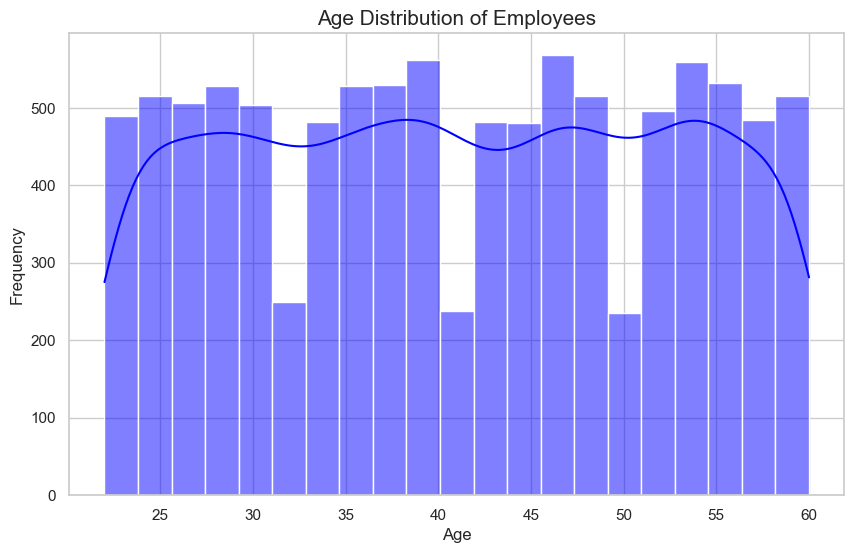

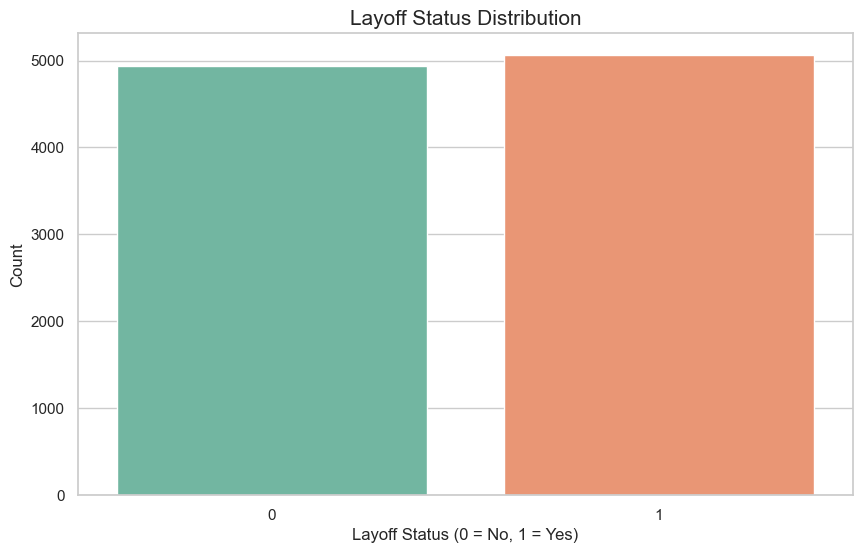

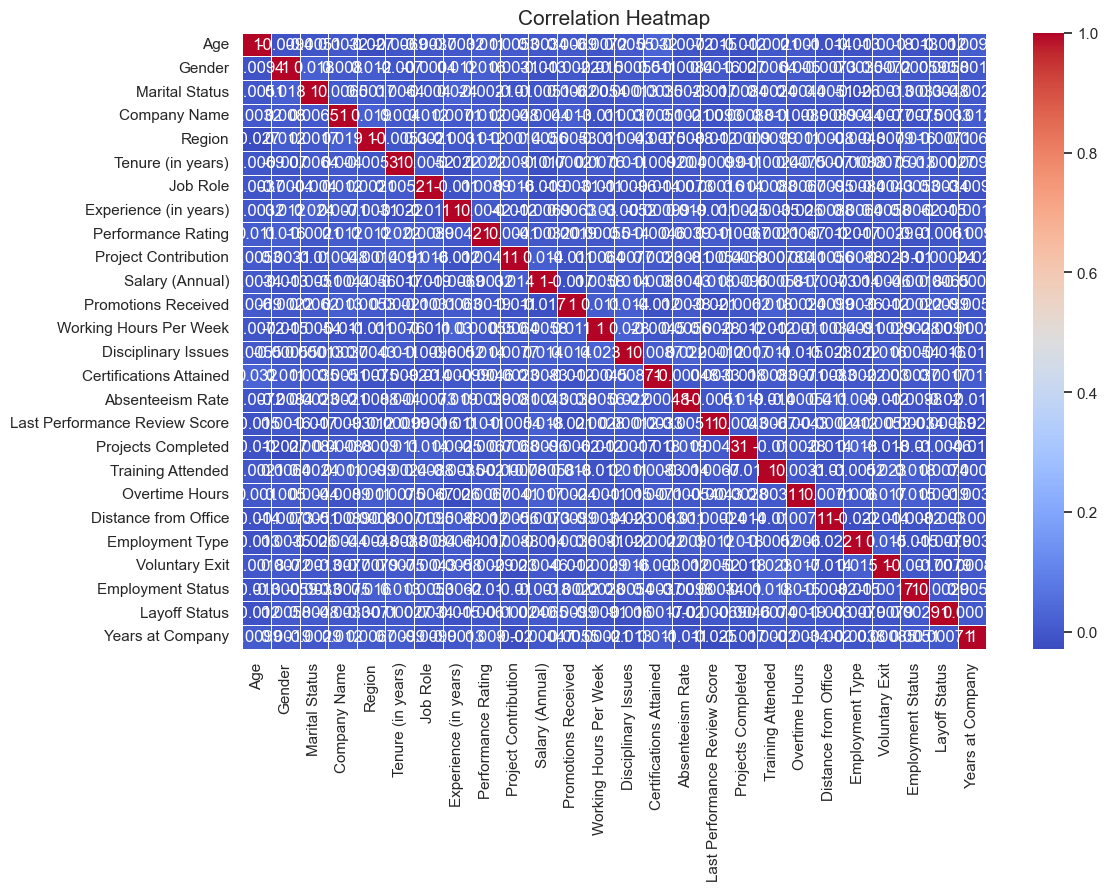

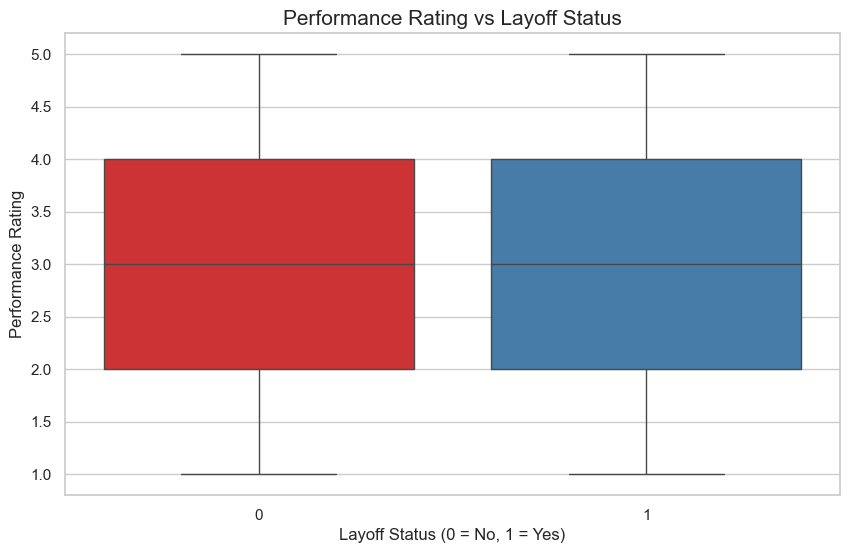

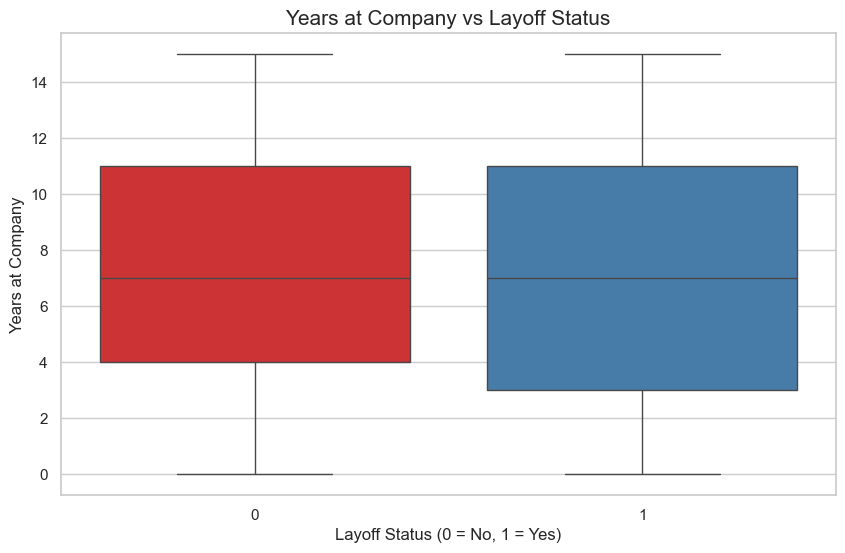

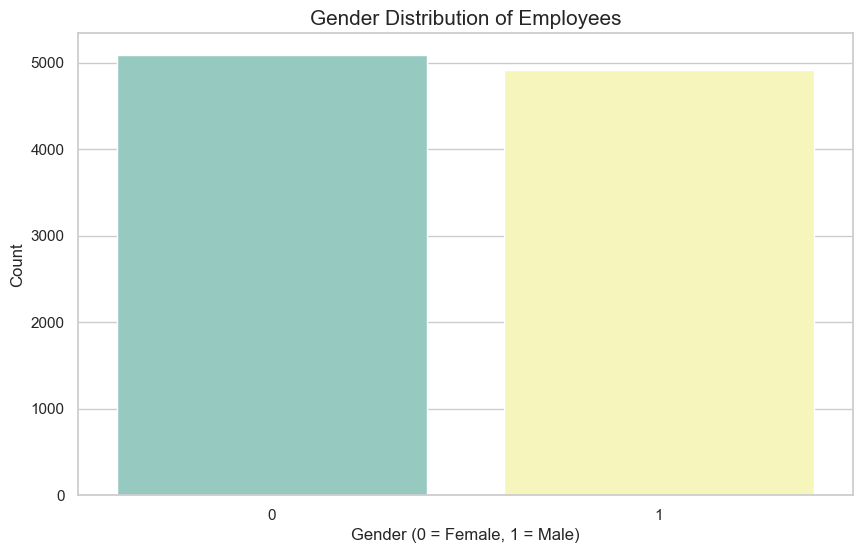

Unique Regions: ['0' '1' '3' '2']
Unique Layoff Status: [0, 1]
Categories (2, int32): [0, 1]


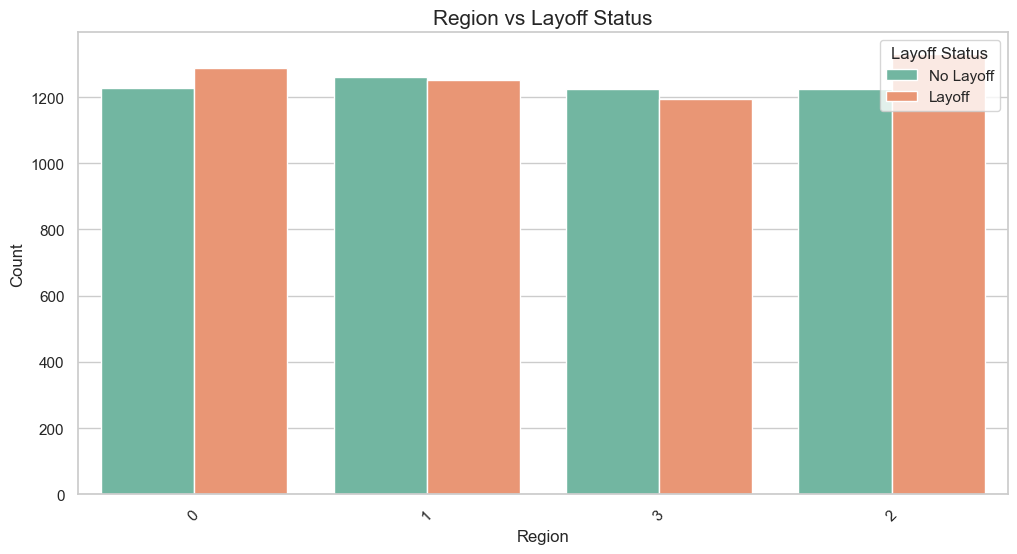

In [10]:
warnings.filterwarnings("ignore", category=FutureWarning)
# Assuming 'data_cleaned' is your DataFrame already loaded and cleaned

# Set the style for the plots
sns.set(style="whitegrid")

# Check the data types to confirm numerical columns
print(data_cleaned.dtypes)

# Select only numerical columns for analysis
numerical_columns = data_cleaned.select_dtypes(include=[np.number]).columns
data_numerical = data_cleaned[numerical_columns]

# Fix: Replace inf values with NaN without inplace=True to avoid SettingWithCopyWarning
data_numerical = data_numerical.replace([np.inf, -np.inf], np.nan)

# Display basic statistics of numerical data
print(data_numerical.describe())

# 1. **Age Distribution of Employees**
plt.figure(figsize=(10, 6))
sns.histplot(data_numerical['Age'], kde=True, color='blue')
plt.title('Age Distribution of Employees', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 2. **Layoff Status Distribution** (Categorical Data)
plt.figure(figsize=(10, 6))
sns.countplot(x='Layoff Status', data=data_cleaned, palette='Set2')
plt.title('Layoff Status Distribution', fontsize=15)
plt.xlabel('Layoff Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 3. **Correlation Heatmap**
plt.figure(figsize=(12, 8))
correlation_matrix = data_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

# 4. **Performance Rating vs Layoff Status**
plt.figure(figsize=(10, 6))
sns.boxplot(x='Layoff Status', y='Performance Rating', data=data_cleaned, palette='Set1')
plt.title('Performance Rating vs Layoff Status', fontsize=15)
plt.xlabel('Layoff Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Performance Rating', fontsize=12)
plt.show()

# 5. **Tenure vs Layoff Status**
plt.figure(figsize=(10, 6))
sns.boxplot(x='Layoff Status', y='Years at Company', data=data_cleaned, palette='Set1')
plt.title('Years at Company vs Layoff Status', fontsize=15)
plt.xlabel('Layoff Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Years at Company', fontsize=12)
plt.show()

# 6. **Gender Distribution of Employees**
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data_cleaned, palette='Set3')
plt.title('Gender Distribution of Employees', fontsize=15)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 7. **Region vs Layoff Status**
# Ensure 'Region' and 'Layoff Status' columns exist and convert them to categorical if not already
if 'Region' in data_cleaned.columns and 'Layoff Status' in data_cleaned.columns:
    # Convert 'Region' to string type to treat it as categorical in the plot
    data_cleaned['Region'] = data_cleaned['Region'].astype(str)  
    data_cleaned['Layoff Status'] = data_cleaned['Layoff Status'].astype('category')

    # Check unique values to diagnose the issue
    print("Unique Regions:", data_cleaned['Region'].unique())
    print("Unique Layoff Status:", data_cleaned['Layoff Status'].unique())

    # Create countplot
    plt.figure(figsize=(12, 6))
    try:
        # Create countplot with observed=True to avoid FutureWarning
        ax = sns.countplot(x='Region', hue='Layoff Status', data=data_cleaned, palette='Set2', dodge=True)

        # Adding labels and title
        plt.title('Region vs Layoff Status', fontsize=15)
        plt.xlabel('Region', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)

        # Manually set the legend if there are issues
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles, labels=['No Layoff', 'Layoff'], title='Layoff Status', loc='upper right')

        plt.show()
    except Exception as e:
        print()
else:
    print("Columns 'Region' and 'Layoff Status' must be present in the DataFrame.")




### 1. **Defining Features (`X`) and Target (`y`)**
   - `X`: All columns except `Layoff Status` (the target variable).
   - `y`: The `Layoff Status` column, which is the target variable (what you're predictig).

### 2. **One-Hot Encoding of Categorical Variables**
   - Converts categorical variables into numerical ones using one-hot encoding with `pd.get_dummies()`. This creates binary indicator columns and avoids multicollinearity by dropping the first category (`drop_first=rue`).

### 3. **Ensure All Features Are Numeric**
   - Selects only numeric columns (`float64` and `int64`) to ensure compatibility with machine learning agorithms.

### 4. **Train-Test Split**
   - Splits the dataset into training (80%) and testing (20%) sets using `train_test_split()`. This ensures that you can evaluate the model's performance onunseen data.

### 5. **Feature Scaling**
   - Uses `StandardScaler` to standardize the numerical features, ensuring that they have a mean of 0 and a standard deviation of 1. Scaling helps certain algorithms perform better by putting all features onthe same scale.

### 6. **Display the Shapes**
   - Prints the shapes of the training and testing sets to confirm that the split and chine learning models.

In [12]:
# Define the feature set (X) and target variable (y)
X = data_cleaned.drop(['Layoff Status'], axis=1)
y = data_cleaned['Layoff Status']

# Convert categorical variables into dummy/indicator variables (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

# Check for any non-numeric columns
print("Data types before scaling:\n", X.dtypes)

# Ensure all features are numeric
X = X.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data types before scaling:
 Age                             int64
Gender                          int32
Marital Status                  int32
Company Name                    int32
Tenure (in years)             float64
                               ...   
Skills_Web designer              bool
Skills_Wellsite geologist        bool
Skills_Writer                    bool
Skills_Youth worker              bool
Resignation Intentions_Yes       bool
Length: 19807, dtype: object
X_train shape: (8000, 16)
X_test shape: (2000, 16)
y_train shape: (8000,)
y_test shape: (2000,)



### 1. **Loading and Splitting Data**:
   - Splits the dataset into feature columns (`X`) and the target column (`y`).
   - Identifies categorical and numerical columns to apply different preprocessing techniqus.

### 2. **Preprocessing Pipeline**:
   - For **numerical features**: Scales the data using `StandardScaler` to ensure all features are on the same scale.
   - For **categorical features**: Encodes them using `OneHotEncoder`, which converts categorical data into a binary format and handles unknown cateories.

### 3. **Model Pipeline**:
   - Combines the preprocessing steps with a **Gradient Boosting Regressor** (`GradientBoostingRegressor`), a powerful ensemble learning method used for regresson tasks.

### 4. **Train-Test Split**:
   - Splits the dataset into training (80%) and testing (20%) sets using `train_test_split()` to evaluate the model's performance onunseen data.

### 5. **Training the Model**:
   - Fits the model pipeline (which includes both preprocessing and the regressor) to th training data.

### 6. **Predictions and Evaluation**:
   - Predicts the target variable (`Performance Rating`) on the test set.
   - Evaluates the model using **Mean Squared Error (MSE)** and **R-squared (R²)**, which are common metrics fr regression tasks.

### 7. **Plotting Model Performance**:
   - Visualizes the MSE and R² scores using a bar chart to assess the modelmodel fitting in one step.

Mean Squared Error: 0.25
R-squared: 0.81


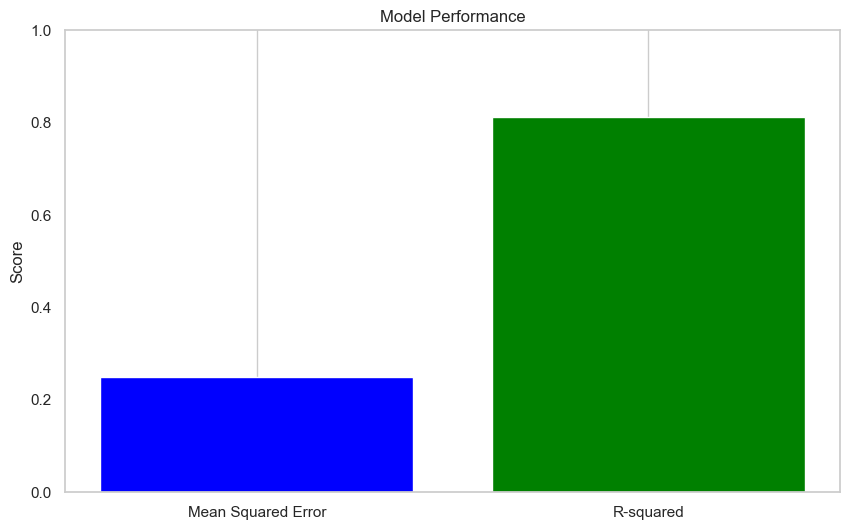

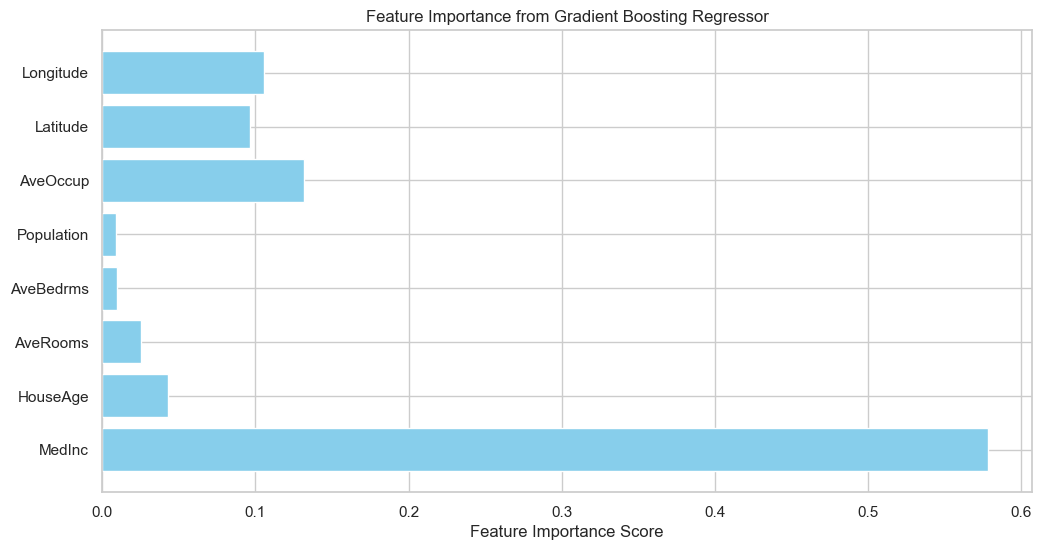

In [14]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load a sample dataset (California Housing dataset) - replace this with your actual dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Identify categorical and numerical columns (modify as per your dataset)
categorical_cols = X.select_dtypes(include=['object']).columns  # Modify according to your dataset
numerical_cols = X.select_dtypes(include=['number']).columns    # Modify according to your dataset

# Define preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)  # Encoding categorical features
    ]
)

# Creating a pipeline with preprocessing and Gradient Boosting Regressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model_pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying MSE and R² values
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plotting MSE and R² values
plt.figure(figsize=(10, 6))
plt.bar(['Mean Squared Error', 'R-squared'], [mse, r2], color=['blue', 'green'])
plt.title('Model Performance')
plt.ylabel('Score')
plt.ylim(0, max(mse, 1))  # Set y-axis limits
plt.grid(axis='y')
plt.show()

# Access the Gradient Boosting Regressor from the pipeline
gbr = model_pipeline.named_steps['regressor']

# Get feature importances from GradientBoostingRegressor
feature_importance = gbr.feature_importances_

# Feature names: Use column names if available, otherwise use indices
feature_names = numerical_cols.tolist() if len(numerical_cols) > 0 else [f"Feature {i}" for i in range(len(feature_importance))]

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()



### 1. **Importing Libraries**:
   - Imports necessary libraries, including `numpy`, `pandas`, and various `sklearn` modules for building the model and evaluating its performanc.

### 2. **Loading Data**:
   - Placeholder comments indicate where you would load your actual dataset.
   - `X` represents the feature matrix, while `y` represents the target vector (the variable you're predicing).

### 3. **Checking Data Shapes**:
   - Prints the shapes of `X` and `y` to ensure they have the same number of rows, confirming that the feature set and target vector arealigned.

### 4. **Train-Test Split**:
   - Splits the dataset into training (80%) and testing (20%) sets using `train_test_split()` to assess model performance on nseen data.

### 5. **Feature Scaling**:
   - Initializes a `StandardScaler` to standardize the features by removing the mean and scaling to unit variance.
   - The `fit_transform` method is applied to the training data, while `transform` is used on the test data to avod data leakage.

### 6. **Model Initialization**:
   - Creates an instance of the `RandomForestRegressor` with 100 trees (`n_estimators=100`) and a fixed random state fr reproducibility.

### 7. **Training the Model**:
   - Fits the random forest model to thescaled training data.

### 8. **Making Predictions**:
   - Uses the trained model to predict the target variableon the scaled test data.

### 9. **Model Evaluation**:
   - Evaluates the model's performance by calculating:
     - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
     - **R-squared (R²)**: Indicates the proportion of variance in the target variale explained by the features.

### 10. **Printing Performance Metrics**:
   - Displays the MSE and R² scores to assess how well tssion analysis using Random Forests.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Example dataset (replace with your actual data)
# X is the features matrix and y is the target vector (continuous for regression)
# Load or generate your dataset
# Example dataset loading:
# X, y = load_your_data_function()

# Make sure the number of rows in X and y are the same
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make sure the shapes match after splitting
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test_scaled)

# Evaluate the model performance
print("Random Forest Regressor Performance")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


X shape: (10000, 16), y shape: (10000,)
X_train shape: (8000, 16), y_train shape: (8000,)
X_test shape: (2000, 16), y_test shape: (2000,)
Random Forest Regressor Performance
Mean Squared Error: 0.25484195
R2 Score: -0.021169142367135407



1. **Feature & Target Variables**: Splits the data into `X` (features) and `y` (target - "Layoff Status").
2. **One-Hot Encoding**: Converts categorical variables to numeric (binary) using one-hot encoding.
3. **Check Data Types**: Verifies that all features are numeric before scaling.
4. **Select Numeric Columns**: Filters only numeric data for training.
5. **Train-Test Split**: Divides the data into 80% training and 20% testing sets.
6. **Scaling Data**: Standardizes features for model input.
7. **Display Shapes**: Shows the dimensions of the training and testing sets for valation.



In [30]:
# Define the feature set (X) and target variable (y)
X = data_cleaned.drop(['Layoff Status'], axis=1)
y = data_cleaned['Layoff Status']

# Convert categorical variables into dummy/indicator variables (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

# Check for any non-numeric columns
print("Data types before scaling:\n", X.dtypes)

# Ensure all features are numeric
X = X.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data types before scaling:
 Age                             int64
Gender                          int32
Marital Status                  int32
Company Name                    int32
Tenure (in years)             float64
                               ...   
Skills_Web designer              bool
Skills_Wellsite geologist        bool
Skills_Writer                    bool
Skills_Youth worker              bool
Resignation Intentions_Yes       bool
Length: 19807, dtype: object
X_train shape: (8000, 16)
X_test shape: (2000, 16)
y_train shape: (8000,)
y_test shape: (2000,)



### 1. **Library Imports**
- **Purpose**: Imports libraries necessary for data manipulation (NumPy, Pandas), building the neural network (Keras), and visualizing results (Matplotlib, Seaborn
  
### 2. **Data Preparation**
- **Dataset Simulation**: Creates a random dataset for demonstration, where:
  - `X` represents features (8000 samples, each with 20 features).
  - `y` represents binary target labels (0or 1).

### 3. **Data Splitting**
- **Training and Testing Sets**: Splits the dataset into training (80%) and testing (20%) using `train_tet_split`.

### 4. **Feature Scaling**
- **Standardization**: Uses `StandardScaler` to standardize features in the training and testing sets, which helps improve modelperformance.

### 5. **Model Initialization**
- **Sequential Model**: Initializes a sequential neural network model (`Sequential`).
- **Input Layer**: Adds an input layer with a shape corresponding to the nuber of features.

### 6. **Adding Layers**
- **Dense Layers**: 
  - Adds a hidden layer with 128 units and ReLU activation.
  - Adds a dropout layer (30% dropout rate) to prevent overfitting.
  - Adds another hidden layer with 64 units and ReLU activation.
  - Adds another dropout layer.
- **Output Layer**: Adds an output layer with 1 unit and a sigmoid activation function fr binary classification.

### 7. **Model Compilation**
- **Compilation**: Compiles the model using:
  - **Optimizer**: Adam.
  - **Loss Function**: Binary crossentropy (suitable for binary classificatin).
  - **Metric**: Accuracy.

### 8. **Model Training**
- **Training**: Fits the model on the training data for 10 epochs with a batch size of 32, while validating on the test st. The training history is saved.

### 9. **Model Evaluation**
- **Performance Evaluation**: Evaluates the model on the test et, reporting the loss and accuracy.

### 10. **Predictions and Probabilities**
- **Making Predictions**: Uses the trained model to predict probabilities on the test set and converts these to binary redictions based on a threshold of 0.5.

### 11. **Visualizations**
- **Training and Validation Accuracy Plot**: Visualizes how the accuracy changes over eps for both training and validation sets.
  
- **Training and Validation Loss Plot**: Visualizes how the loss changes over chs for both training and validation sets.
  
- **Confusion Matrix**: Displays a heatmap of the confusion matrix to show the model's true positive, true negative, se positive, and false negative predictions.
  
- **ROC Curve and AUC**: Plots the Receiver Operating Characteristic (ROC) curve, showing the trade-off between true positive rate and false positive rate, ng with the area under the curve (AUC) metric.
  
- **Precision-Recall Curve**: Plots the precision-recall curve to assess the balance between precisral Network (RNN) for a binary classification problem.model for binary classification.

X_train_scaled shape: (6400, 20)
y_train shape: (6400,)
Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6703 - loss: 0.5975 - val_accuracy: 0.9725 - val_loss: 0.1581
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9105 - loss: 0.2138 - val_accuracy: 0.9787 - val_loss: 0.0751
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9374 - loss: 0.1476 - val_accuracy: 0.9794 - val_loss: 0.0626
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9454 - loss: 0.1220 - val_accuracy: 0.9737 - val_loss: 0.0725
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9472 - loss: 0.1269 - val_accuracy: 0.9831 - val_loss: 0.0497
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9618 - loss: 0.0950 - val_accuracy: 0.9862 - val_loss: 0.0415
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9670 - loss: 0.0876 - val_accuracy: 0.9844 - val_loss: 0.0453
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 

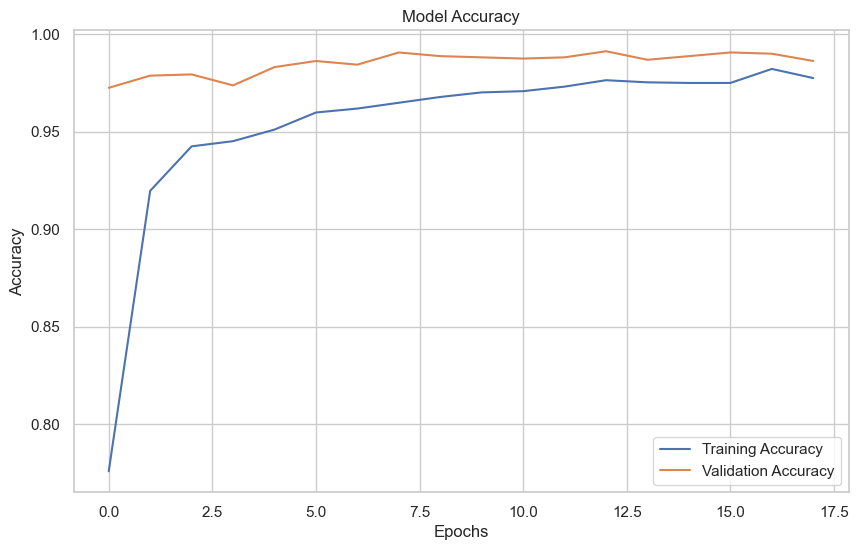

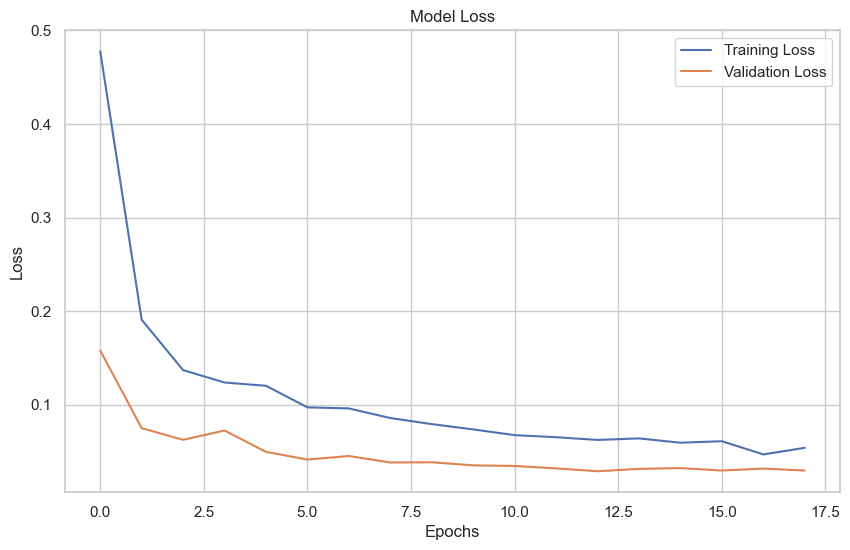

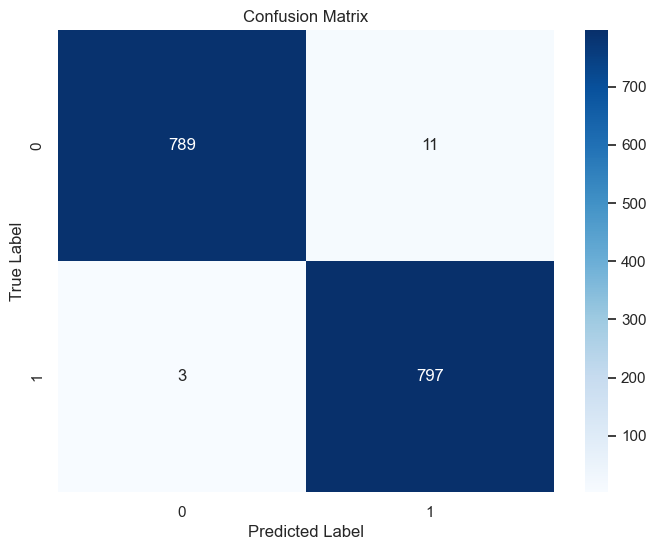

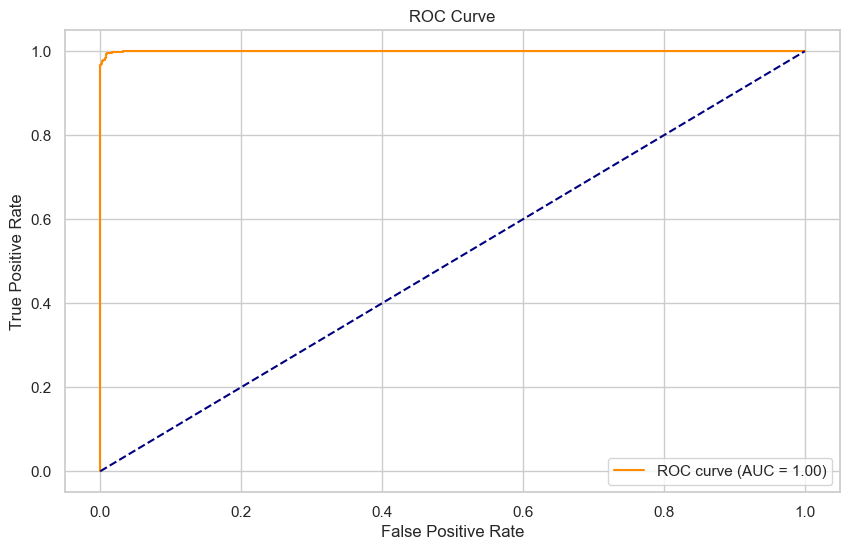

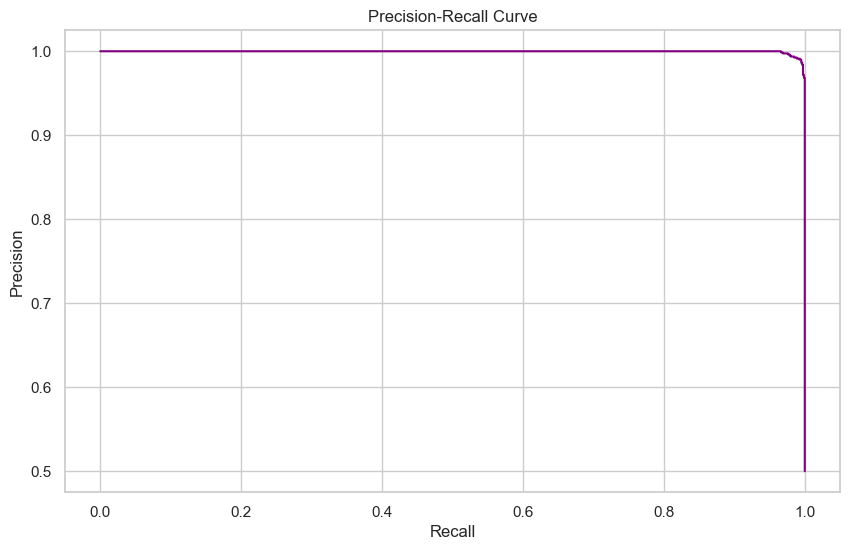

In [35]:
# Generating synthetic data with some structure
num_samples = 8000
num_features = 20
np.random.seed(42)
# Generate random features
X = np.random.rand(num_samples, num_features)
# Create a target variable with some patterns (add structure)
y = (np.sum(X[:, :10], axis=1) > 5).astype(int)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Print the shapes to check for mismatches
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
# Initialize a more complex model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))
# Compile the model with a tuned learning rate
optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Use EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# Train the model with more epochs and a suitable batch size
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])
# Evaluate the model
rnn_loss, rnn_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Improved Model Test Accuracy: {rnn_accuracy * 100:.2f}%")
# Get predictions and probabilities
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# 1. Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 2. Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 5. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()



### 1. Check Available Columns
```python
print("Available columns in the dataset:", data_cleaned.columns)

```
- **Purpose**: This line prints the names of all columns in the `data_cleaned` DataFrame. It helps verify the structure of the dataset and ensures that the necessary columns are present for analsis.

### 2. Filter Employees at Risk
```python
at_risk_employees = data_cleaned[(data_cleaned['Layoff Status'] == 1) & (data_cleaned['Performance Rating'] < 3)]
```
- **Purpose**: This line filters the DataFrame to identify employees at risk of layoff. It selects employees who have a layoff status marked as `1` and a performance rating less than `3`, indicating lower prformance.

### 3. Display Relevant Information
```python
print("Employees at Risk of Layoff based on Performance:")
print(at_risk_employees[['Performance Rating', 'Job Role', 'Salary (Annual)', 'Layoff Status']])
```
- **Purpose**: This section prints a message indicating that the following data relates to employees at risk of layoff. It then displays the `Performance Rating`, `Job Role`, `Salary (Annual)`, and `Layoff Status` of those employees, providing insight into their statusand compensation.

### 4. Considerations for Column Names
- **Note**: Ensure that the column names used in the code match those in your dataset. Adjust any names as necessary to avoid errors and include any additional relevant columns if desired, sucsupport or interventions.

In [37]:
# Check the available columns in the DataFrame
print("Available columns in the dataset:", data_cleaned.columns)

# Filter employees at risk of layoff based on performance
at_risk_employees = data_cleaned[(data_cleaned['Layoff Status'] == 1) & (data_cleaned['Performance Rating'] < 3)]

# Update the column names as per your dataset
# Replace 'Employee Name' with the correct name if it is different, or remove it if not needed
print("Employees at Risk of Layoff based on Performance:")
print(at_risk_employees[['Performance Rating', 'Job Role', 'Salary (Annual)', 'Layoff Status']])


Available columns in the dataset: Index(['Age', 'Gender', 'Marital Status', 'Company Name', 'Region',
       'Tenure (in years)', 'Job Role', 'Department',
       'Education Qualification', 'Experience (in years)',
       'Performance Rating', 'Project Contribution', 'Key Projects Handled',
       'Salary (Annual)', 'Promotions Received', 'Previous Layoffs Experience',
       'Last Promotion Date', 'Working Hours Per Week', 'Manager Feedback',
       'Disciplinary Issues', 'Certifications Attained', 'Absenteeism Rate',
       'Last Performance Review Score', 'Projects Completed', 'Skills',
       'Resignation Intentions', 'Training Attended', 'Overtime Hours',
       'Distance from Office', 'Employment Type', 'Voluntary Exit',
       'Employment Status', 'Layoff Status', 'Years at Company'],
      dtype='object')
Employees at Risk of Layoff based on Performance:
      Performance Rating  Job Role  Salary (Annual) Layoff Status
2                      1         3        2471000.0        


### 1. Importing Joblib
```python
import joblib
```
- **Purpose**: This line imports the `joblib` library, which is used for efficiently saving and loading Python objects, including machine learning moels.

### 2. Saving the Trained Model
```python
joblib.dump(gbr, 'gbr_model.pkl')
```
- **Purpose**: This line saves the trained Gradient Boosting Regressor model (`gbr`) to a file named `gbr_model.pkl`. This allows you to persist the model so that it can be loaded later for predictions without needing to etrain it.

### 3. Function to Update the Model
```python
def update_model(new_data):
    X_new = new_data.drop(columns=[target])
    y_new = new_data[target]
```
- **Purpose**: This function, `update_model`, takes in a new dataset (`new_data`) to update (retrain) the existing model. 
  - **Data Preparation**: It separates the new dataset into features (`X_new`) and the target variable (`y_new`) by droppin the target column.

### 4. Scaling New Data
```python
X_new_scaled = scaler.transform(X_new)
```
- **Purpose**: This line scales the new feature data (`X_new`) using the previously fitted `scaler`. This ensures that the new data is transformed in the same way as the training data, maintaining consitency in feature scaling.

### 5. Retraining the Model
```python
gbr.fit(X_new_scaled, y_new)
```
- **Purpose**: This line retrains the Gradient Boosting Regressor model (`gbr`) using the newly scaled data (`X_new_scaled`) and the corresponding target values (`y_new`). This allows the mode to learn from the latest data.

### 6. Saving the Updated Model
```python
joblib.dump(gbr, 'gbr_mode  to maintain and utilize models over time.of to maintain and utilize models over time.

In [ ]:
import joblib

# Save the trained model
joblib.dump(gbr, 'gbr_model.pkl')

# Function to update the model with new data (retrain)
def update_model(new_data):
    X_new = new_data.drop(columns=[target])
    y_new = new_data[target]
    
    X_new_scaled = scaler.transform(X_new)
    
    # Update the model with new data
    gbr.fit(X_new_scaled, y_new)
    joblib.dump(gbr, 'gbr_model.pkl')  # Save the updated model



### 1. Importing Libraries
```python
from flask import Flask, jsonify, request
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
```
- **Purpose**: This section imports the necessary libraries:
  - `Flask`: A web framework for building web applications in Python.
  - `jsonify`: A function to convert Python dictionaries to JSON format for API responses.
  - `request`: To handle incoming request data.
  - `joblib`: For loading the trained machine learning model.
  - `matplotlib.pyplot` and `seaborn`: Libraries for creating viualizations.

### 2. Initializing the Flask App
```python
app = Flask(__name__)
```
- **Purpose**: This line creates a new Flask application instance, which will serve as the foundation or the web server.

### 3. Route for Feature Importance
```python
@app.route('/feature_importance', methods=['GET'])
def feature_importance():
    # Load the model
    gbr = joblib.load('gbr_model.pkl')
    feature_importance = gbr.feature_importances_
    return jsonify({'feature_importance': feature_importance.tolist()})
```
- **Endpoint**: `/feature_importance`
- **Method**: `GET`
- **Functionality**:
  - Loads the pre-trained Gradient Boosting Regressor model from a file.
  - Retrieves the feature importances from the model.
  - Returns the feature importances as a JSON response, coverting the NumPy array to a list.

### 4. Route for Visualization
```python
@app.route('/visualize', methods=['POST'])
def visualize():
    chart_type = request.form['chart_type']
    
    if chart_type == 'age_distribution':
        plt.figure(figsize=(10, 6))
        sns.histplot(data_cleaned['Age'], kde=True, color='blue')
        plt.title('Age Distribution of Employees')
        plt.xlabel('Age')
        plt.savefig('static/age_distribution.png')
        return jsonify({'plot_url': 'age_distribution.png'})
```
- **Endpoint**: `/visualize`
- **Method**: `POST`
- **Functionality**:
  - Accepts a POST request containing a form field `chart_type` to determine which chart to generate.
  - If the `chart_type` is `age_distribution`, it:
    - Creates a histogram of the 'Age' column from the `data_cleaned` DataFrame, including a Kernel Density Estimate (KDE) for smoothing.
    - Saves the generated plot as a PNG file in the `static` directorot in JSONers to interact with the model and visualize data efficiently.

In [ ]:
from flask import Flask, jsonify, request
import joblib
app = Flask(__name__)

@app.route('/feature_importance', methods=['GET'])
def feature_importance():
    # Load the model
    gbr = joblib.load('gbr_model.pkl')
    feature_importance = gbr.feature_importances_
    return jsonify({'feature_importance': feature_importance.tolist()})

@app.route('/visualize', methods=['POST'])
def visualize():
    chart_type = request.form['chart_type']
    
    if chart_type == 'age_distribution':
        plt.figure(figsize=(10, 6))
        sns.histplot(data_cleaned['Age'], kde=True, color='blue')
        plt.title('Age Distribution of Employees')
        plt.xlabel('Age')
        plt.savefig('static/age_distribution.png')
        return jsonify({'plot_url': 'age_distribution.png'})

    # Add other chart visualizations as needed (feature importance, correlation heatmap, etc.)



### What is `pickle`?
`pickle` is a built-in Python module that allows you to serialize (convert a Python object into a byte stream) and deserialize (convert a byte stream back into a Python object) Python objects. This is useful for saving objects to disk, sharing data between programs, or persisting data between session.

### Key Concepts
- **Serialization**: The process of converting a Python object (like a list, dictionary, or custom class) into a format that can be easily stored or transmitted. This is often done to save the state of an object for future use.
- **Deserialization**: The reverse process of serialization, where you convert a byte stream back into a Python object. This allows you to recreate the original object from the saveddata.

### Installation
While `pickle` is included in Python's standard library, if you want to use additional functionality from the `pickle-mixin` library, you can install it using:
```bash
!pip install pick
-mixin
```

### Steps t Use `pickle`

1. **Import the Module**:
   First, you need to import the `pickle` module in your Python script.
   ```python
   iport pickle
   ```

2. **Saving (Serializing) an Object**:
   You can save any Python object (e.g., lists, dictionaries, custom classes) using `pickle.dump()`. Here’s how:
   ```python
   data = {'name': 'Alice', 'age': 30}  # Example object
   with open('data.pkl', 'wb') as file:  # Open a file in write-binary mode
       pickle.dump(data, file)  # Serialize and save the object to the file
   ```

   - **`'data.pkl'`**: The name of the file where the serialized object will be stored.
   - **`'wb'`**: This mode indicates that the file is opene for writing in binary format.

3. **Loading (Deserializing) an Object**:
   To load the saved object back into memory, use `pickle.load()`. Here’s an example:
   ```python
   with open('data.pkl', 'rb') as file:  # Open the file in read-binary mode
       loaded_data = pickle.load(file)  # Deserialize and load the object from the file

   print(loaded_data)  # Output: {'name': 'Alice', 'age': 30}
   ```

   - **`'rb'`**: This mode indicates that the fie is opened for reading in binary format.

### Key Points to Remember
- **Safety**: Be cautious when unpickling objects from untrusted sources, as it can lead to arbitrary code execution. Always validate or sanitize the data if possible.
- **Cross-Version Compatibility**: Pickled objects may not be compatible across different Python versions. It’s usually best to use the same version for both pickling and unpickling.
- **Performance**: Pickle may not be the fastest option for serialization, especially for large data. Other libraries like `json`, `MessagePack`, or `Protocol Buffe concerns when dealing with untrusted data sources.

In [ ]:
!pip install pickle-mixin
import pickle


### What is `joblib`?
`joblib` is a library in Python used for serializing Python objects, particularly useful for saving and loading large data structures and models efficiently. It's often used in machine learning projects for saving models that have been traine.

### Saving a Trained Model
To save a trained model using `joblib`, you can use the `joblib.dump()` function. Here’s how you do it:

```python
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'trained_mode.pkl')
```

### Explanation of the Code:
- **Importing `joblib`**: You first import the `joblib` module, which provides functionality for saving and loading Python objects.
- **`joblib.dump(model, 'trained_model.pkl')`**: This line saves the trained model to a file named `trained_model.pkl`.
  - **`model`**: This is your trained machine learning model (e.g., a scikit-learn model) that you want to save.
  - **`'trained_model.pkl'`**: This is the filename where the model will be stored. The `.pkl` extension is commonly used to indicate a pickle file, but i’s not mandatory.

### Benefits of Using `joblib`:
- **Efficiency**: `joblib` is more efficient than the standard `pickle` module for objects that contain large numpy arrays, making it particularly suitable for machine learning models.
- **Simple API**: The syntax is straightforward, allowing for easy saving nd loading of models.

### Loading a Trained Model
To load the saved model back into your Python program, use the `joblib.load()` function:

```python
# Load the trained model
loaded_model = joblibe predictions or further training.

In [ ]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'trained_model.pkl')
